In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#  **1. Load Data**

In [2]:
import openpyxl

In [ ]:
df =df = pd.read_excel('C:/Users/thiru/Downloads/Online Retail.xlsx', sheet_name= 'Online Retail')
df.shape

(541909, 8)



#  **2. Data Preparation**


### Remove the observations with Negative quantity values

In [4]:
df = df[df['Quantity'] >= 0]
df.shape

(531285, 8)

### Add a column for "Sales"

In [5]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **3.Data Analysis**

### What's the total revenue per country? (Arrange the maximum value first)

In [13]:
revenue_df = df.groupby('Country', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
revenue_df

,Country,Sales
36,United Kingdom,9003097.964
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


### Picturize the countrywise Total sales in Barplot

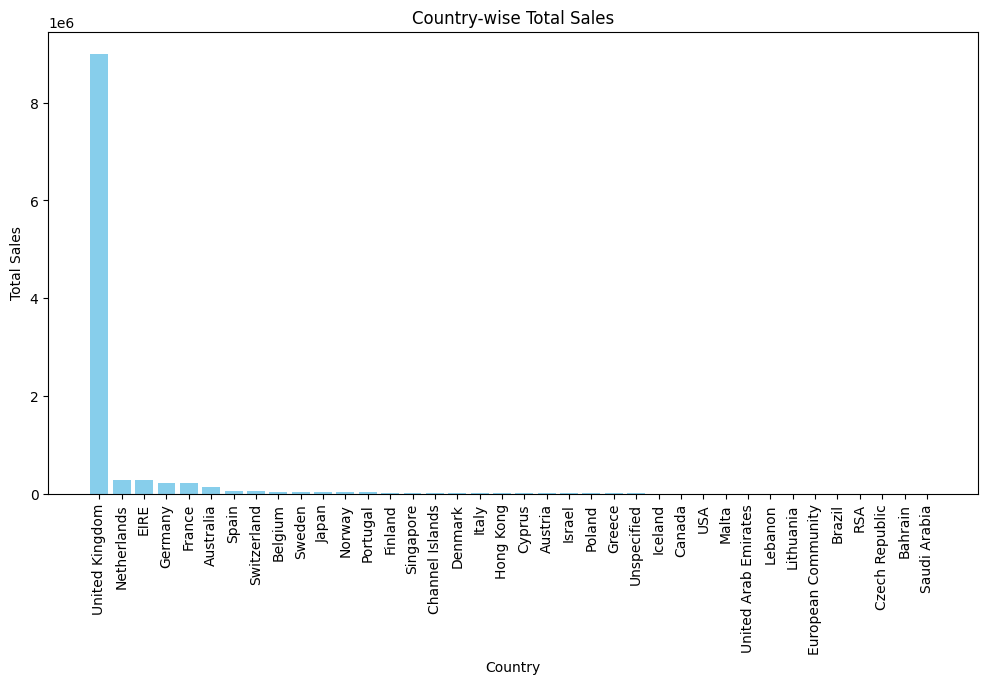

In [16]:
revenue_df = revenue_df.sort_values(by='Sales', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12,6))
plt.bar(revenue_df['Country'], revenue_df['Sales'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Country-wise Total Sales')
plt.show()

### Retreive United Kingdom customers only and named the resultant data frame as df_uk for further Analysis

In [17]:
df_uk = df[df['Country'] == 'United Kingdom'].copy()
df_uk.shape

(486286, 9)

### What are the products that are most bought in UK?

In [18]:
top_products_uk= df_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
top_products_uk.head(10)



,StockCode,Quantity
2394,23843,80995
1948,23166,77036
1036,22197,53343
2568,84077,49526
3541,85099B,44268
3552,85123A,39513
2673,84879,33735
1419,22616,25331
366,21212,24986
1017,22178,23692


### Calculate the number of orders per customer?

In [20]:
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


### Find Popular Items in the month of September 2011

In [28]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='ME'), 'StockCode'
    ])['Quantity'].sum().reset_index()
)
date_item_df

,InvoiceDate,StockCode,Quantity
0,2010-12-31,10002,251
1,2010-12-31,10120,16
2,2010-12-31,10125,154
3,2010-12-31,10133,130
4,2010-12-31,10135,411
...,...,...,...
34172,2011-12-31,DCGSSBOY,1
34173,2011-12-31,DOT,17
34174,2011-12-31,M,819
34175,2011-12-31,POST,124


In [27]:
September_month_sorted_df = (
    date_item_df
    .reset_index()
    .loc[lambda x: (x['InvoiceDate'].dt.year == 2011) & (x['InvoiceDate'].dt.month == 9)]
    .sort_values(by='Quantity', ascending=False)
)
September_month_sorted_df.head(10)

,index,InvoiceDate,StockCode,Quantity
25704,25704,2011-09-30,85099B,4401
23949,23949,2011-09-30,22197,4196
24593,24593,2011-09-30,22952,3711
25204,25204,2011-09-30,84077,3515
23409,23409,2011-09-30,21212,3426
24186,24186,2011-09-30,22492,3373
25244,25244,2011-09-30,84879,3064
23761,23761,2011-09-30,21915,3020
24828,24828,2011-09-30,23203,2758
24102,24102,2011-09-30,22386,2711
